# WebScrapper download files

In [1]:
# import requests

# # Define las coordenadas
# latitude = 	24.1000
# longitude = -99.8166

# # Encuentra la estación más cercana
# station_url = f"https://api.weather.gov/points/{latitude},{longitude}"
# response = requests.get(station_url, headers={"User-Agent": "Alain"})
# stations = response.json()

# # Imprimir la respuesta
# print(stations)


---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load 'BOCNL.csv'
df = pd.read_csv('BOCNL.csv')

# Print columns
display(df.head())

,Fecha,Nivel(m),Gasto(m³/s)
0,01-01-14,-,-
1,02-01-14,0.35,1.94
2,03-01-14,0.35,1.9
3,04-01-14,0.33,1.71
4,05-01-14,0.32,1.62


C:\Users\aesca\AppData\Local\Temp\ipykernel_13492\1398248311.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')
C:\Users\aesca\AppData\Local\Temp\ipykernel_13492\1398248311.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])


0.30404092071611255


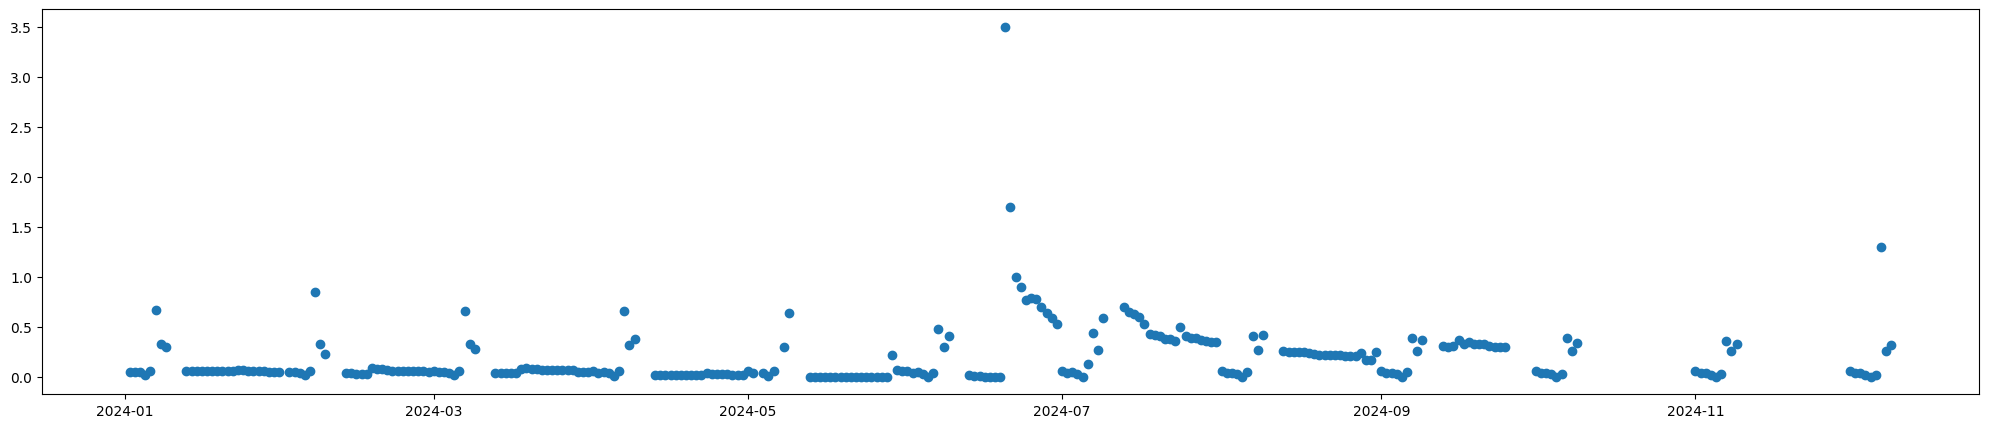

In [3]:
# Convert second column to float
df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')

# Mean of second column
mean = df.iloc[:, 1].mean()
print(mean)

# First column is date
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set date as index
df.set_index(df.iloc[:, 0], inplace=True)

# Set plot size to (20,3)
plt.figure(figsize=(25, 5))
plt.scatter(df.loc['01/01/2024':'12/31/2024'].iloc[:, 0], df.loc['01/01/2024':'12/31/2024'].iloc[:, 1])
plt.show()


,Fecha,Nivel(m),Gasto(m³/s)
0,02-01-95,1.2,2.42
1,03-01-95,-,-
2,04-01-95,-,-
3,05-01-95,-,-
4,06-01-95,-,-


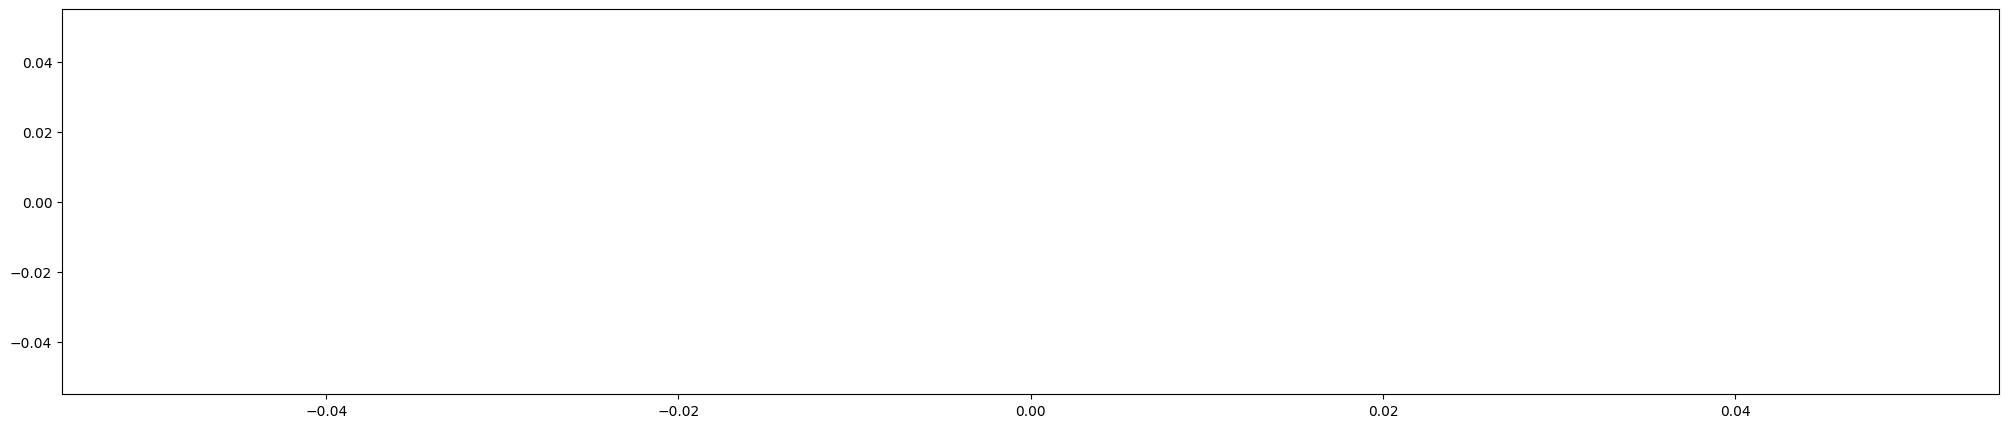

In [9]:
# Load 'CDRNL.csv'
df_2 = pd.read_csv('CDRNL.csv')

# Print columns
display(df_2.head())

# Set plot size to (20,3)
plt.figure(figsize=(25, 5))
plt.scatter(df_2.loc['01-01-14':'05/09/24'].iloc[:, 0], df_2.loc['01-01-14':'05/09/24'].iloc[:, 1])
plt.show()

---

In [12]:
# Load 'Coord.xlsx'
df_3 = pd.read_excel('Coord.xlsx')

# Columns 'Latitud' and 'Longitud' are coordinates
df_3['Latitud'] = pd.to_numeric(df_3['Latitud'], errors='coerce')
df_3['Longitud'] = pd.to_numeric(df_3['Longitud'], errors='coerce')

# Use 'Latitud' and 'Longitud' to plot using geopy
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Create a location column
df_3['Location'] = df_3['Latitud'].astype(str) + ', ' + df_3['Longitud'].astype(str)

# Plot map
import folium
m = folium.Map(location=[df_3['Latitud'].mean(), df_3['Longitud'].mean()], zoom_start=5)
for i in range(len(df_3)):
    folium.Marker([df_3['Latitud'][i], df_3['Longitud'][i]], popup=df_3['Location'][i]).add_to(m)

# Show map
m.save('map.html')
m